## Retail Intelligence System 

### Libraries & Models 

In [221]:
import pandas as pd          # Data manipulation
import numpy as np           # Numerical operations
import matplotlib.pyplot as plt   # Basic plotting
import seaborn as sns             # Advanced statistical plots
import sqlite3
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_auc_score
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from statsmodels.tsa.arima.model import ARIMA

#### Load Dataset

In [222]:
df = pd.read_csv("E:/project/Row data/Retail_Sales_200K_Advanced_Full_Features.csv")
df

,Order_ID,Order_Date,Ship_Date,Customer_ID,Segment,Region,Category,Sub_Category,Sales,Quantity,...,Shipping_Mode,Delivery_Days,Customer_Age,Customer_Gender,City_Tier,Marketing_Channel,Returned,Customer_Tenure_Months,Customer_Lifetime_Value,Avg_Order_Value
0,ORD1000000,2024-09-17,2024-09-23,CUST3917,Consumer,South,Furniture,Bookcases,1154.89,5,...,Second Class,6,42,Male,Tier 3,Referral,0,1,21952.28,1291.310588
1,ORD1000001,2023-03-26,2023-03-31,CUST5224,Corporate,South,Office Supplies,Binders,510.25,11,...,Second Class,5,55,Female,Tier 3,Direct,0,18,13273.58,1106.131667
2,ORD1000002,2024-01-20,2024-01-21,CUST8570,Corporate,South,Furniture,Tables,1823.29,9,...,Standard Class,1,67,Female,Tier 2,Social Media,1,50,28319.34,1665.843529
3,ORD1000003,2022-07-30,2022-08-06,CUST12689,Home Office,North,Technology,Laptops,2505.71,2,...,Same Day,7,47,Male,Tier 1,Google Ads,0,41,10834.38,1203.820000
4,ORD1000004,2021-02-24,2021-03-03,CUST3550,Home Office,West,Technology,Phones,947.51,5,...,Second Class,7,33,Female,Tier 1,Email,0,26,13341.07,1212.824545
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
199995,ORD1199995,2024-02-27,2024-03-02,CUST2369,Consumer,South,Office Supplies,Paper,1837.70,9,...,Standard Class,4,50,Female,Tier 3,Referral,1,60,17044.54,1311.118462
199996,ORD1199996,2021-01-14,2021-01-16,CUST8386,Consumer,North,Technology,Accessories,520.26,1,...,Second Class,2,62,Male,Tier 3,Referral,0,43,24836.49,1379.805000
199997,ORD1199997,2024-06-12,2024-06-14,CUST3725,Home Office,East,Technology,Phones,446.48,6,...,Same Day,2,64,Male,Tier 1,Email,0,50,24026.06,1601.737333
199998,ORD1199998,2022-11-14,2022-11-16,CUST9003,Consumer,North,Furniture,Tables,579.10,3,...,First Class,2,49,Female,Tier 3,Google Ads,0,54,17222.63,1076.414375


#### Basic Data Understanding


In [170]:
df.head()

,Order_ID,Order_Date,Ship_Date,Customer_ID,Segment,Region,Category,Sub_Category,Sales,Quantity,...,Shipping_Mode,Delivery_Days,Customer_Age,Customer_Gender,City_Tier,Marketing_Channel,Returned,Customer_Tenure_Months,Customer_Lifetime_Value,Avg_Order_Value
0,ORD1000000,2024-09-17,2024-09-23,CUST3917,Consumer,South,Furniture,Bookcases,1154.89,5,...,Second Class,6,42,Male,Tier 3,Referral,0,1,21952.28,1291.310588
1,ORD1000001,2023-03-26,2023-03-31,CUST5224,Corporate,South,Office Supplies,Binders,510.25,11,...,Second Class,5,55,Female,Tier 3,Direct,0,18,13273.58,1106.131667
2,ORD1000002,2024-01-20,2024-01-21,CUST8570,Corporate,South,Furniture,Tables,1823.29,9,...,Standard Class,1,67,Female,Tier 2,Social Media,1,50,28319.34,1665.843529
3,ORD1000003,2022-07-30,2022-08-06,CUST12689,Home Office,North,Technology,Laptops,2505.71,2,...,Same Day,7,47,Male,Tier 1,Google Ads,0,41,10834.38,1203.820000
4,ORD1000004,2021-02-24,2021-03-03,CUST3550,Home Office,West,Technology,Phones,947.51,5,...,Second Class,7,33,Female,Tier 1,Email,0,26,13341.07,1212.824545


In [171]:
df.tail()

,Order_ID,Order_Date,Ship_Date,Customer_ID,Segment,Region,Category,Sub_Category,Sales,Quantity,...,Shipping_Mode,Delivery_Days,Customer_Age,Customer_Gender,City_Tier,Marketing_Channel,Returned,Customer_Tenure_Months,Customer_Lifetime_Value,Avg_Order_Value
199995,ORD1199995,2024-02-27,2024-03-02,CUST2369,Consumer,South,Office Supplies,Paper,1837.70,9,...,Standard Class,4,50,Female,Tier 3,Referral,1,60,17044.54,1311.118462
199996,ORD1199996,2021-01-14,2021-01-16,CUST8386,Consumer,North,Technology,Accessories,520.26,1,...,Second Class,2,62,Male,Tier 3,Referral,0,43,24836.49,1379.805000
199997,ORD1199997,2024-06-12,2024-06-14,CUST3725,Home Office,East,Technology,Phones,446.48,6,...,Same Day,2,64,Male,Tier 1,Email,0,50,24026.06,1601.737333
199998,ORD1199998,2022-11-14,2022-11-16,CUST9003,Consumer,North,Furniture,Tables,579.10,3,...,First Class,2,49,Female,Tier 3,Google Ads,0,54,17222.63,1076.414375
199999,ORD1199999,2023-12-22,2023-12-29,CUST12848,Home Office,Central,Technology,Accessories,377.01,8,...,Same Day,7,19,Male,Tier 3,Direct,0,40,9794.11,1224.263750


In [172]:
df.shape


(200000, 24)

In [173]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200000 entries, 0 to 199999
Data columns (total 24 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   Order_ID                 200000 non-null  object 
 1   Order_Date               200000 non-null  object 
 2   Ship_Date                200000 non-null  object 
 3   Customer_ID              200000 non-null  object 
 4   Segment                  200000 non-null  object 
 5   Region                   200000 non-null  object 
 6   Category                 200000 non-null  object 
 7   Sub_Category             200000 non-null  object 
 8   Sales                    200000 non-null  float64
 9   Quantity                 200000 non-null  int64  
 10  Discount                 200000 non-null  float64
 11  Profit                   200000 non-null  float64
 12  Churn                    200000 non-null  int64  
 13  Payment_Mode             200000 non-null  object 
 14  Ship

In [174]:
df.describe()

,Sales,Quantity,Discount,Profit,Churn,Delivery_Days,Customer_Age,Returned,Customer_Tenure_Months,Customer_Lifetime_Value,Avg_Order_Value
count,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000
mean,1525.722634,6.506840,0.175012,95.462791,0.149780,4.003105,43.937010,0.099625,30.465795,23288.922471,1525.722634
std,851.784853,3.453423,0.101023,103.349042,0.356857,1.999441,15.282551,0.299500,17.300428,6621.972424,226.458234
min,50.010000,1.000000,0.000000,-75.000000,0.000000,1.000000,18.000000,0.000000,1.000000,2507.900000,597.585714
25%,787.690000,4.000000,0.090000,14.010000,0.000000,2.000000,31.000000,0.000000,15.000000,18651.200000,1373.942500
50%,1524.985000,7.000000,0.180000,65.520000,0.000000,4.000000,44.000000,0.000000,30.000000,22948.030000,1526.032632
75%,2263.760000,10.000000,0.260000,155.790000,0.000000,6.000000,57.000000,0.000000,45.000000,27506.340000,1677.765789
max,2999.960000,12.000000,0.350000,449.840000,1.000000,7.000000,70.000000,1.000000,60.000000,52128.160000,2529.050000


In [175]:
df.isnull()

,Order_ID,Order_Date,Ship_Date,Customer_ID,Segment,Region,Category,Sub_Category,Sales,Quantity,...,Shipping_Mode,Delivery_Days,Customer_Age,Customer_Gender,City_Tier,Marketing_Channel,Returned,Customer_Tenure_Months,Customer_Lifetime_Value,Avg_Order_Value
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
199995,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
199996,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
199997,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
199998,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [176]:
df.isnull().sum()

Order_ID                   0
Order_Date                 0
Ship_Date                  0
Customer_ID                0
Segment                    0
Region                     0
Category                   0
Sub_Category               0
Sales                      0
Quantity                   0
Discount                   0
Profit                     0
Churn                      0
Payment_Mode               0
Shipping_Mode              0
Delivery_Days              0
Customer_Age               0
Customer_Gender            0
City_Tier                  0
Marketing_Channel          0
Returned                   0
Customer_Tenure_Months     0
Customer_Lifetime_Value    0
Avg_Order_Value            0
dtype: int64

#### Convert Date Columns & Feature Engineering

In [177]:
df['Order_Date'] = pd.to_datetime(df['Order_Date'])
df['Ship_Date'] = pd.to_datetime(df['Ship_Date'])

In [178]:
df.head()

,Order_ID,Order_Date,Ship_Date,Customer_ID,Segment,Region,Category,Sub_Category,Sales,Quantity,...,Shipping_Mode,Delivery_Days,Customer_Age,Customer_Gender,City_Tier,Marketing_Channel,Returned,Customer_Tenure_Months,Customer_Lifetime_Value,Avg_Order_Value
0,ORD1000000,2024-09-17,2024-09-23,CUST3917,Consumer,South,Furniture,Bookcases,1154.89,5,...,Second Class,6,42,Male,Tier 3,Referral,0,1,21952.28,1291.310588
1,ORD1000001,2023-03-26,2023-03-31,CUST5224,Corporate,South,Office Supplies,Binders,510.25,11,...,Second Class,5,55,Female,Tier 3,Direct,0,18,13273.58,1106.131667
2,ORD1000002,2024-01-20,2024-01-21,CUST8570,Corporate,South,Furniture,Tables,1823.29,9,...,Standard Class,1,67,Female,Tier 2,Social Media,1,50,28319.34,1665.843529
3,ORD1000003,2022-07-30,2022-08-06,CUST12689,Home Office,North,Technology,Laptops,2505.71,2,...,Same Day,7,47,Male,Tier 1,Google Ads,0,41,10834.38,1203.820000
4,ORD1000004,2021-02-24,2021-03-03,CUST3550,Home Office,West,Technology,Phones,947.51,5,...,Second Class,7,33,Female,Tier 1,Email,0,26,13341.07,1212.824545


In [179]:
df['Processing_Days'] = (df['Ship_Date'] - df['Order_Date']).dt.days    #Processing Time

In [180]:
#Recency Feature
import datetime
today = datetime.datetime.today()

df['Recency_Days'] = (today - df['Order_Date']).dt.days

In [181]:
#Profit Margin

df['Profit_Margin'] = df['Profit'] / df['Sales']


In [182]:
#Extract Time Components
df['Year'] = df['Order_Date'].dt.year
df['Month'] = df['Order_Date'].dt.month
df['Day'] = df['Order_Date'].dt.day

In [183]:
df.head()

,Order_ID,Order_Date,Ship_Date,Customer_ID,Segment,Region,Category,Sub_Category,Sales,Quantity,...,Returned,Customer_Tenure_Months,Customer_Lifetime_Value,Avg_Order_Value,Processing_Days,Recency_Days,Profit_Margin,Year,Month,Day
0,ORD1000000,2024-09-17,2024-09-23,CUST3917,Consumer,South,Furniture,Bookcases,1154.89,5,...,0,1,21952.28,1291.310588,6,522,-0.014997,2024,9,17
1,ORD1000001,2023-03-26,2023-03-31,CUST5224,Corporate,South,Office Supplies,Binders,510.25,11,...,0,18,13273.58,1106.131667,5,1063,0.124998,2023,3,26
2,ORD1000002,2024-01-20,2024-01-21,CUST8570,Corporate,South,Furniture,Tables,1823.29,9,...,1,50,28319.34,1665.843529,1,763,0.024999,2024,1,20
3,ORD1000003,2022-07-30,2022-08-06,CUST12689,Home Office,North,Technology,Laptops,2505.71,2,...,0,41,10834.38,1203.820000,7,1302,0.115001,2022,7,30
4,ORD1000004,2021-02-24,2021-03-03,CUST3550,Home Office,West,Technology,Phones,947.51,5,...,0,26,13341.07,1212.824545,7,1823,0.059999,2021,2,24


## Basic Exploratory Data Analysis (EDA)

In [184]:
#Churn Distribution
df['Churn'].value_counts(normalize=True)

Churn
0    0.85022
1    0.14978
Name: proportion, dtype: float64

In [185]:
#Sales by Region
df.groupby('Region')['Sales'].sum().sort_values(ascending=False)

Region
West       61294301.28
North      61076612.10
Central    61056875.97
East       60936569.05
South      60780168.42
Name: Sales, dtype: float64

In [186]:
#Category Profitability
df.groupby('Category')['Profit'].sum()

Category
Furniture          6364605.02
Office Supplies    6357543.01
Technology         6370410.25
Name: Profit, dtype: float64

In [187]:
#Return Rate
df['Returned'].mean()

np.float64(0.099625)

In [216]:
#Category Performance
df.groupby('Category')['Profit'].sum()

Category
0    6364605.02
1    6357543.01
2    6370410.25
Name: Profit, dtype: float64

In [217]:
#Churn Analysis
df['Churn'].value_counts()

Churn
0    170044
1     29956
Name: count, dtype: int64

In [218]:
#CLV Distribution
df.groupby('Customer_ID')['Customer_Lifetime_Value'].mean()

Customer_ID
CUST1000     34047.93
CUST10000    18594.45
CUST10001    20836.52
CUST10002    20756.70
CUST10003    15143.69
               ...   
CUST9995     17329.78
CUST9996     23754.10
CUST9997     29891.52
CUST9998      9008.78
CUST9999      9982.52
Name: Customer_Lifetime_Value, Length: 14001, dtype: float64

## SQL Analysis

In [225]:
#SQLite Database
conn = sqlite3.connect("retail_analysis.db")

df.to_sql("retail_data", conn, if_exists="replace", index=False)

200000

#### Data Validation Using SQL

In [226]:
#Total Records
query = "SELECT COUNT(*) AS Total_Rows FROM retail_data;"
pd.read_sql(query, conn)

,Total_Rows
0,200000


In [227]:
#Check Date Range
query = """
SELECT 
    MIN(Order_Date) AS Start_Date,
    MAX(Order_Date) AS End_Date
FROM retail_data;
"""
pd.read_sql(query, conn)

,Start_Date,End_Date
0,2021-01-01,2024-12-31


#### Revenue & Profit Analysis

In [228]:
#Total Revenue
query = """
SELECT ROUND(SUM(Sales),2) AS Total_Revenue
FROM retail_data;
"""
pd.read_sql(query, conn)

,Total_Revenue
0,3.051445e+08


In [229]:
#Total Profit
query = """
SELECT ROUND(SUM(Profit),2) AS Total_Profit
FROM retail_data;
"""
pd.read_sql(query, conn)

,Total_Profit
0,19092558.28


In [230]:
#Profit Margin %
query = """
SELECT 
    ROUND(SUM(Profit)*100.0/SUM(Sales),2) AS Profit_Margin_Percentage
FROM retail_data;
"""
pd.read_sql(query, conn)

,Profit_Margin_Percentage
0,6.26


### Encode Categorical Variables

In [189]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()

categorical_cols = [
    'Segment','Customer_Gender','City_Tier',
    'Category','Sub_Category',
    'Marketing_Channel','Payment_Mode',
    'Region','Shipping_Mode'
]

for col in categorical_cols:
    df[col] = le.fit_transform(df[col])

### CHURN PREDICTION MODEL

In [190]:
# Define X and y
X = df.drop(['Churn','Order_ID','Order_Date','Ship_Date'], axis=1)
y = df['Churn']


#### Train-Test Split

In [191]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42)

#### Feature Scaling

In [192]:
X = df.drop([
    'Churn',
    'Order_ID',
    'Customer_ID',   # ❗ REMOVE THIS
    'Order_Date',
    'Ship_Date'
], axis=1)

y = df['Churn']

In [193]:
print(X.dtypes)

Segment                      int64
Region                       int64
Category                     int64
Sub_Category                 int64
Sales                      float64
Quantity                     int64
Discount                   float64
Profit                     float64
Payment_Mode                 int64
Shipping_Mode                int64
Delivery_Days                int64
Customer_Age                 int64
Customer_Gender              int64
City_Tier                    int64
Marketing_Channel            int64
Returned                     int64
Customer_Tenure_Months       int64
Customer_Lifetime_Value    float64
Avg_Order_Value            float64
Processing_Days              int64
Recency_Days                 int64
Profit_Margin              float64
Year                         int32
Month                        int32
Day                          int32
dtype: object


In [194]:
X = pd.get_dummies(X, drop_first=True)

In [195]:
print(X.dtypes)

Segment                      int64
Region                       int64
Category                     int64
Sub_Category                 int64
Sales                      float64
Quantity                     int64
Discount                   float64
Profit                     float64
Payment_Mode                 int64
Shipping_Mode                int64
Delivery_Days                int64
Customer_Age                 int64
Customer_Gender              int64
City_Tier                    int64
Marketing_Channel            int64
Returned                     int64
Customer_Tenure_Months       int64
Customer_Lifetime_Value    float64
Avg_Order_Value            float64
Processing_Days              int64
Recency_Days                 int64
Profit_Margin              float64
Year                         int32
Month                        int32
Day                          int32
dtype: object


In [196]:
# Drop unwanted columns
X = df.drop(['Churn','Order_ID','Customer_ID','Order_Date','Ship_Date'], axis=1)
y = df['Churn']

# Convert categorical to numeric
X = pd.get_dummies(X, drop_first=True)

# Split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42)

# Scale
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

#### Check Class Imbalance

In [197]:
df['Churn'].value_counts(normalize=True) * 100

Churn
0    85.022
1    14.978
Name: proportion, dtype: float64

### Model 1 – Logistic Regression (Baseline)

In [198]:
from sklearn.linear_model import LogisticRegression
log_model = LogisticRegression(class_weight='balanced')
log_model.fit(X_train, y_train)
y_pred_log = log_model.predict(X_test)

In [199]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred_log))

              precision    recall  f1-score   support

           0       0.84      0.50      0.63     33901
           1       0.15      0.48      0.23      6099

    accuracy                           0.50     40000
   macro avg       0.50      0.49      0.43     40000
weighted avg       0.74      0.50      0.57     40000



### Model 2 – Random Forest (Main Model)

In [200]:
from sklearn.ensemble import RandomForestClassifier

rf_model = RandomForestClassifier(
    n_estimators=200,
    max_depth=10,
    class_weight='balanced',
    random_state=42
)

rf_model.fit(X_train, y_train)

y_pred_rf = rf_model.predict(X_test)

In [201]:
print(classification_report(y_test, y_pred_rf))

              precision    recall  f1-score   support

           0       0.85      0.78      0.81     33901
           1       0.15      0.22      0.18      6099

    accuracy                           0.69     40000
   macro avg       0.50      0.50      0.50     40000
weighted avg       0.74      0.69      0.72     40000



### ROC Curve & AUC

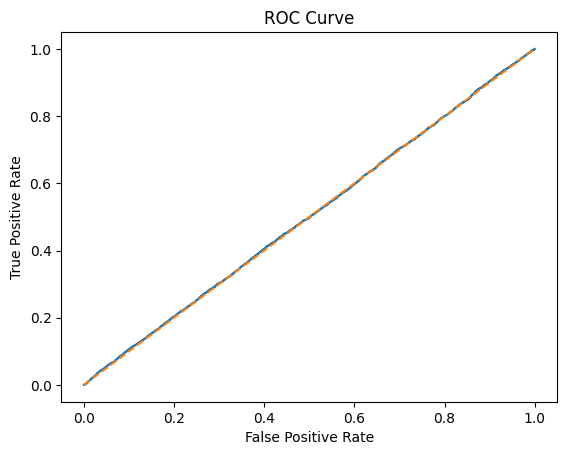

AUC Score: 0.5016082654450778


In [202]:
from sklearn.metrics import roc_curve, roc_auc_score
import matplotlib.pyplot as plt

y_prob = rf_model.predict_proba(X_test)[:,1]

fpr, tpr, thresholds = roc_curve(y_test, y_prob)

plt.plot(fpr, tpr)
plt.plot([0,1],[0,1],'--')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.show()

print("AUC Score:", roc_auc_score(y_test, y_prob))

### Feature Importance (Very Important for Business)

In [203]:
import pandas as pd

feature_importance = pd.Series(
    rf_model.feature_importances_,
    index=X.columns
).sort_values(ascending=False)

feature_importance.head(10)

Customer_Lifetime_Value    0.090031
Avg_Order_Value            0.089013
Sales                      0.088469
Profit_Margin              0.082206
Profit                     0.081313
Recency_Days               0.078886
Customer_Tenure_Months     0.063422
Customer_Age               0.059331
Day                        0.050220
Quantity                   0.034790
dtype: float64

## Sales Forecasting (Time Series Modeling)

#### Data Preparation for Time Series

In [204]:
# Convert to datetime
df['Order_Date'] = pd.to_datetime(df['Order_Date'])

# Set as index
df.set_index('Order_Date', inplace=True)

# Resample Monthly
monthly_sales = df['Sales'].resample('ME').sum()

print(monthly_sales.head())

Order_Date
2021-01-31    6242794.98
2021-02-28    5716773.16
2021-03-31    6521390.88
2021-04-30    6325089.00
2021-05-31    6382378.59
Freq: ME, Name: Sales, dtype: float64


#### Plot Time Series

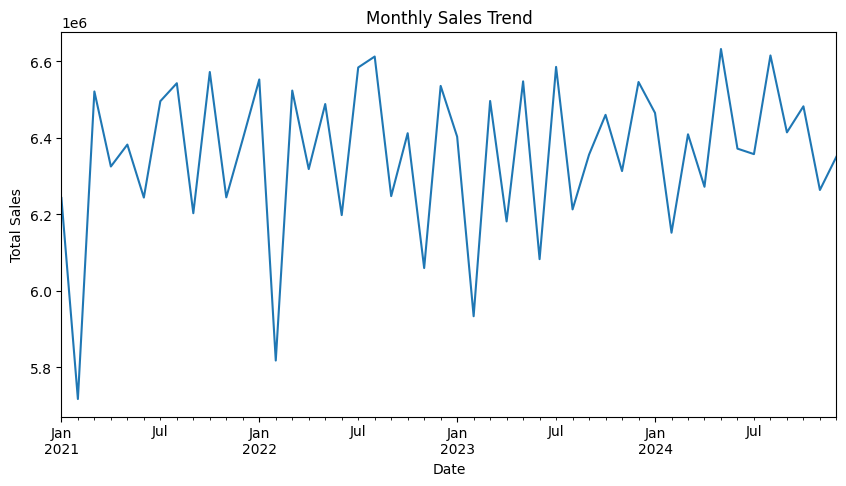

In [205]:
monthly_sales.plot(figsize=(10,5))
plt.title("Monthly Sales Trend")
plt.xlabel("Date")
plt.ylabel("Total Sales")
plt.show()

#### Model 1 – ARIMA Model

In [206]:
# Fit ARIMA Model
model = ARIMA(monthly_sales, order=(5,1,0))
model_fit = model.fit()

In [207]:
#Forecast Next 6 Months
forecast = model_fit.forecast(steps=6)

print(forecast)

2025-01-31    6.319421e+06
2025-02-28    6.330521e+06
2025-03-31    6.330137e+06
2025-04-30    6.327371e+06
2025-05-31    6.329266e+06
2025-06-30    6.328113e+06
Freq: ME, Name: predicted_mean, dtype: float64


#### Plot Forecast

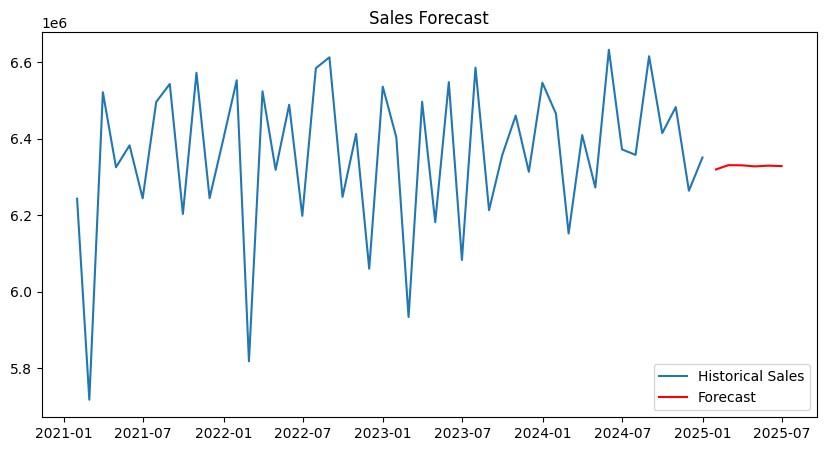

In [208]:
forecast_index = pd.date_range(
    start=monthly_sales.index[-1],
    periods=7,
    freq='ME'
)[1:]

plt.figure(figsize=(10,5))
plt.plot(monthly_sales, label="Historical Sales")
plt.plot(forecast_index, forecast, label="Forecast", color='red')
plt.legend()
plt.title("Sales Forecast")
plt.show()

#### Model Evaluation (Optional Split Method)

In [209]:
train = monthly_sales[:-6]
test = monthly_sales[-6:]

In [210]:
model = ARIMA(train, order=(5,1,0))
model_fit = model.fit()

pred = model_fit.forecast(steps=6)

In [211]:
from sklearn.metrics import mean_squared_error
import numpy as np

rmse = np.sqrt(mean_squared_error(test, pred))
print("RMSE:", rmse)

RMSE: 116612.31102334418
